In [41]:
# Import library
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
from sklearn.preprocessing import LabelEncoder
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-v0_8-whitegrid')
import warnings

In [8]:
path = "C:\\Users\\Paulo\\Desktop\\MBA DATASCIENCE\\Linear Regression\\insurance.csv"
df = pd.read_csv(path)
print('\nNumber of rows and columns in the data set:')
display(df.shape)
print('')

# lets look into top 5 rows of the dataset
display(df.head())


Number of rows and columns in the data set:


(1338, 7)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


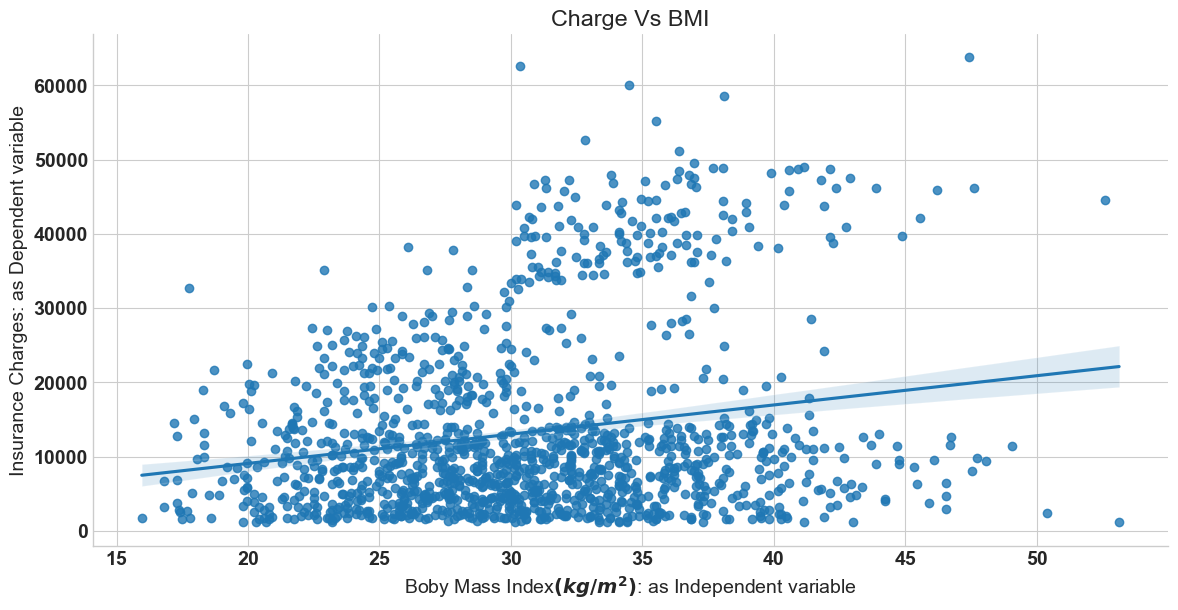

In [9]:
sns.lmplot(x='bmi',y='charges',data=df,aspect=2,height=6)
plt.xlabel('Boby Mass Index$(kg/m^2)$: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charge Vs BMI');

Text(0.5, 1.0, 'Missing Values in the Dataset')

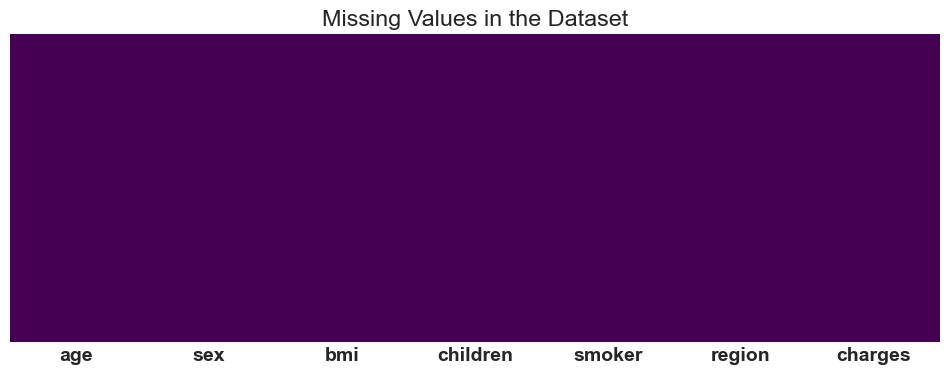

In [11]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values in the Dataset')

<Axes: >

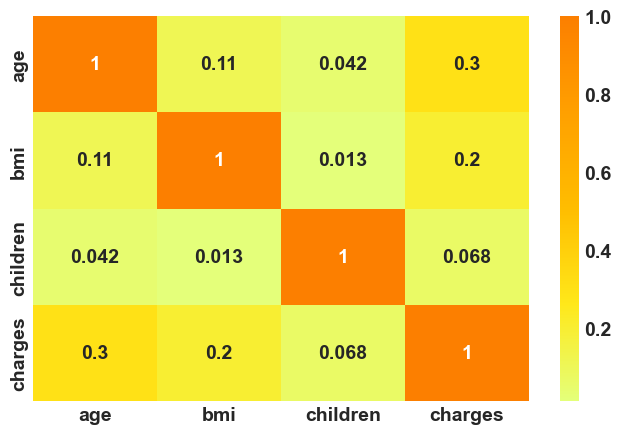

In [19]:
corr = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr, cmap='Wistia', annot=True)

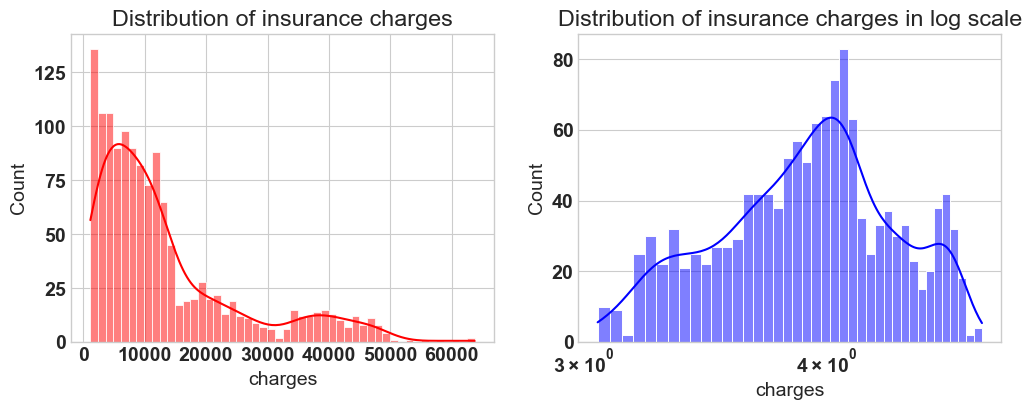

In [38]:
f= plt.figure(figsize=(12,4))

ax = f.add_subplot(121)
sns.histplot(df['charges'], bins=50, color='r', kde=True)
ax.set_title('Distribution of insurance charges')

ax = f.add_subplot(122)
sns.histplot(np.log10(df['charges']), bins=40, color='b', kde=True)
ax.set_title('Distribution of insurance charges in log scale')
ax.set_xscale('log')


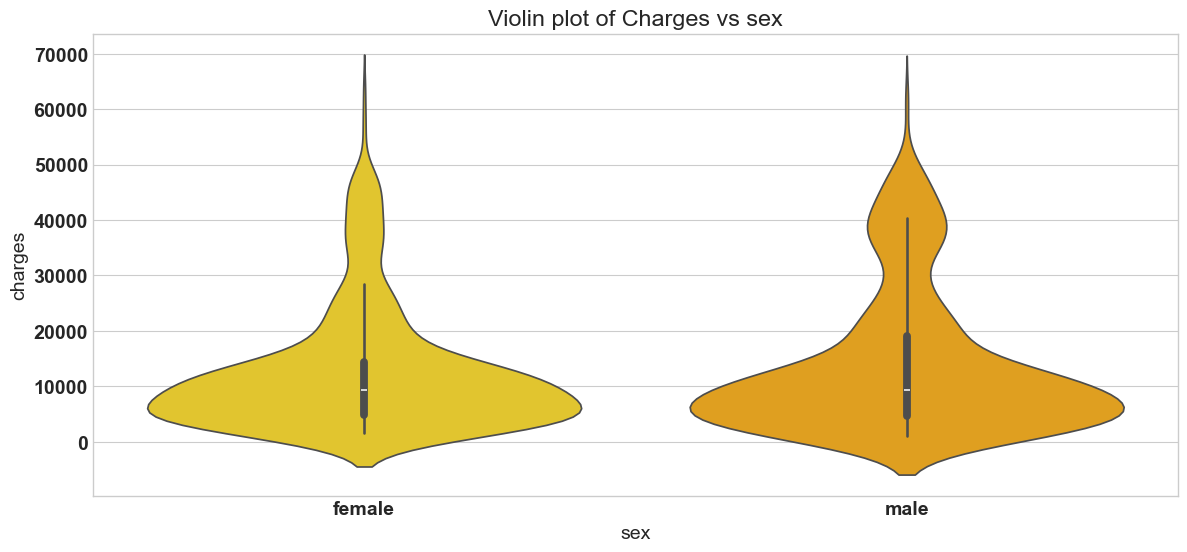

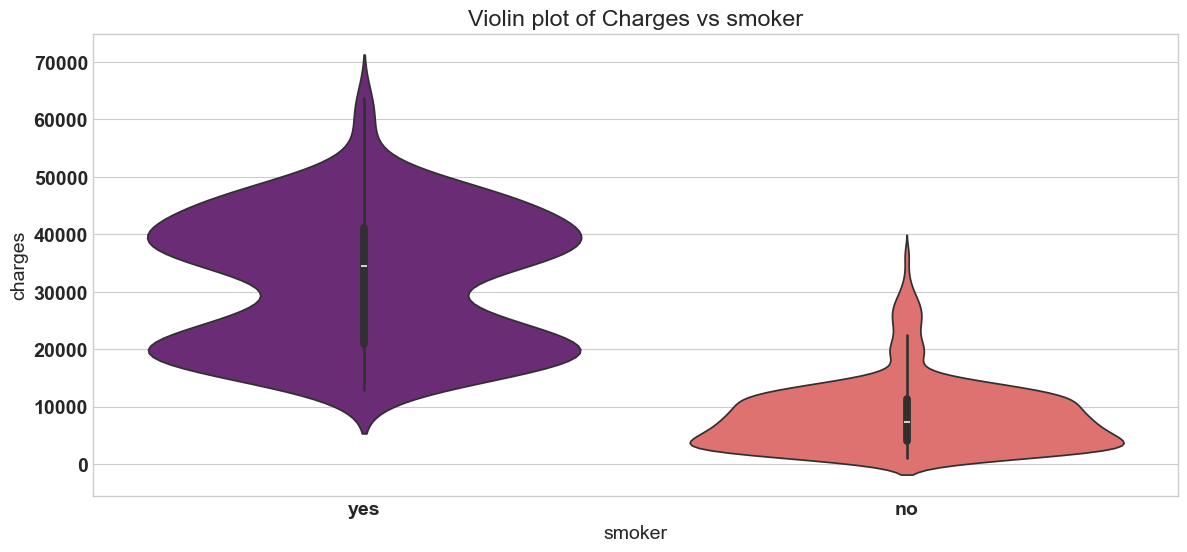

In [43]:
# Silencia apenas avisos do tipo FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Figura 1
plt.figure(figsize=(14,6))
sns.violinplot(x='sex', y='charges', data=df, palette='Wistia')
plt.title('Violin plot of Charges vs sex')
plt.show()

# Figura 2
plt.figure(figsize=(14,6))
sns.violinplot(x='smoker', y='charges', data=df, palette='magma')
plt.title('Violin plot of Charges vs smoker')
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


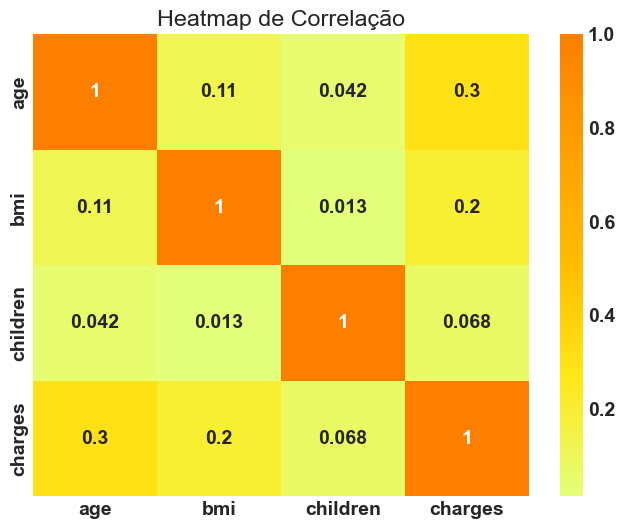

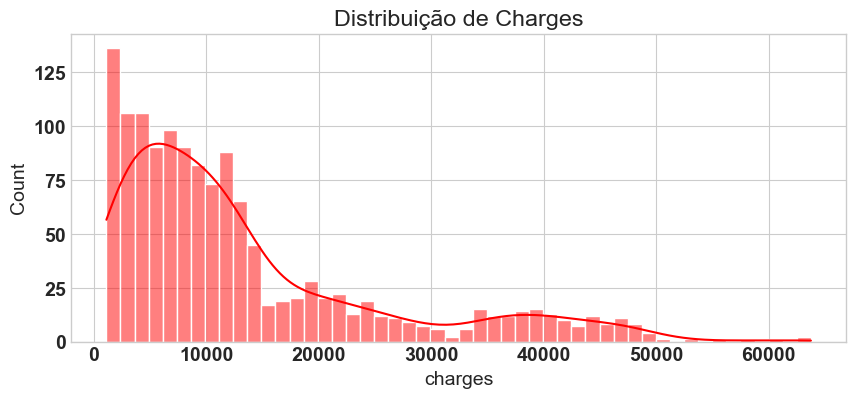

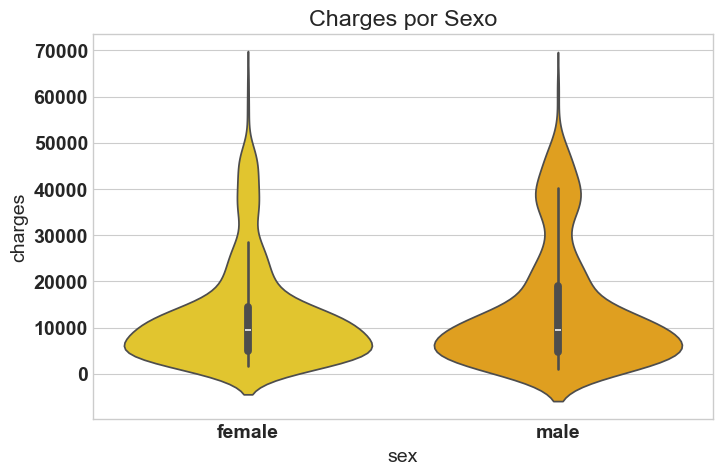

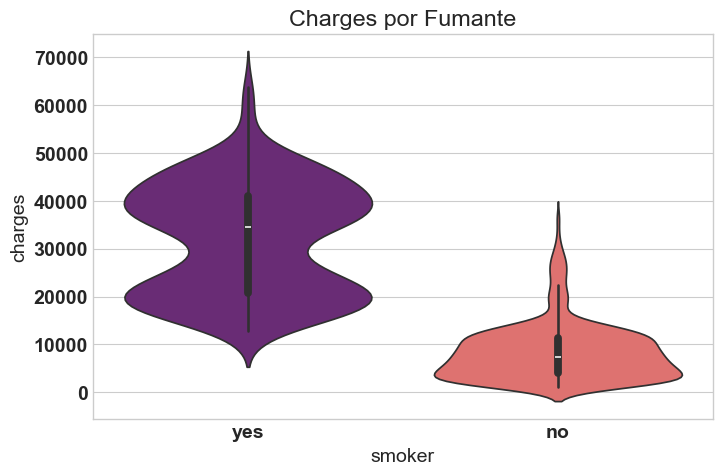

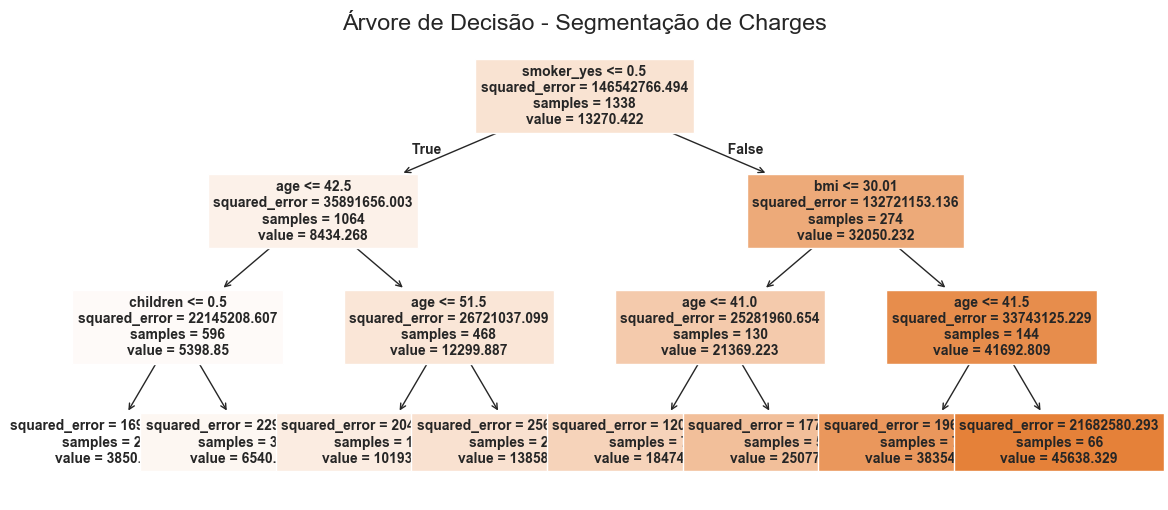

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Opcional: silenciar apenas warnings futuros
warnings.simplefilter(action='ignore', category=FutureWarning)

# ===== 1. Visão geral =====
display(df.info())
display(df.describe())

# ===== 2. Heatmap de correlação =====
plt.figure(figsize=(8,6))
corr = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr, cmap='Wistia', annot=True)
plt.title('Heatmap de Correlação')
plt.show()

# ===== 3. Histograma de charges =====
plt.figure(figsize=(10,4))
sns.histplot(df['charges'], bins=50, color='r', kde=True)
plt.title('Distribuição de Charges')
plt.show()

# ===== 4. Violin plot: sexo vs charges =====
plt.figure(figsize=(8,5))
sns.violinplot(x='sex', y='charges', data=df, palette='Wistia')
plt.title('Charges por Sexo')
plt.show()

# ===== 5. Violin plot: fumante vs charges =====
plt.figure(figsize=(8,5))
sns.violinplot(x='smoker', y='charges', data=df, palette='magma')
plt.title('Charges por Fumante')
plt.show()

# ===== 6. Pequena árvore de decisão =====
# Converter variáveis categóricas em dummies
df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop(columns='charges')
y = df_encoded['charges']

tree = DecisionTreeRegressor(max_depth=3, random_state=42)
tree.fit(X, y)

plt.figure(figsize=(14,6))
plot_tree(tree, feature_names=X.columns, filled=True, fontsize=10)
plt.title('Árvore de Decisão - Segmentação de Charges')
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

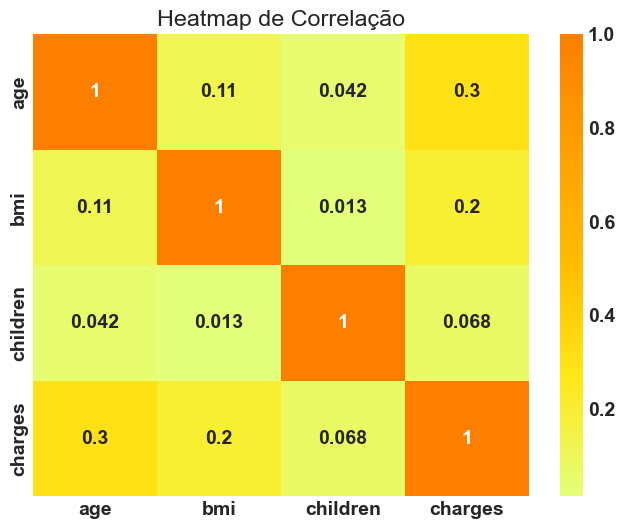

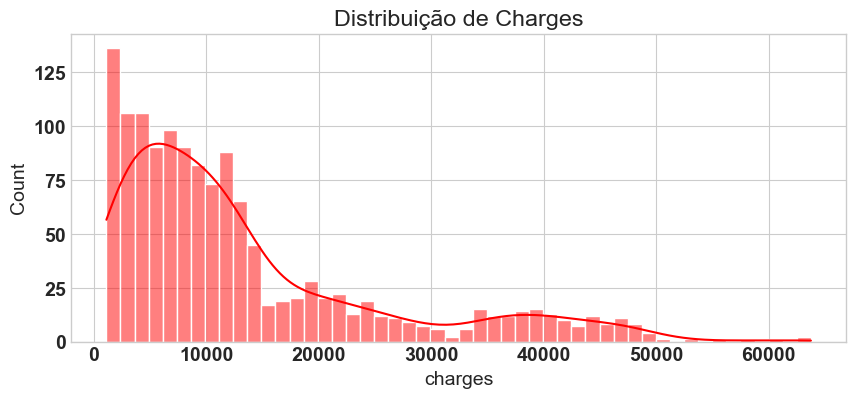

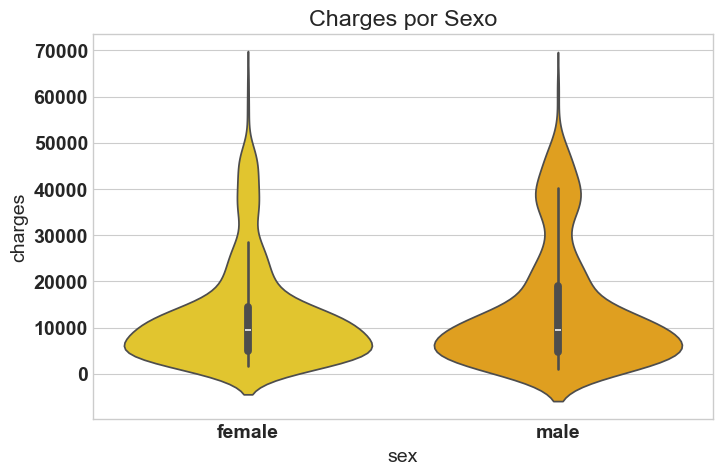

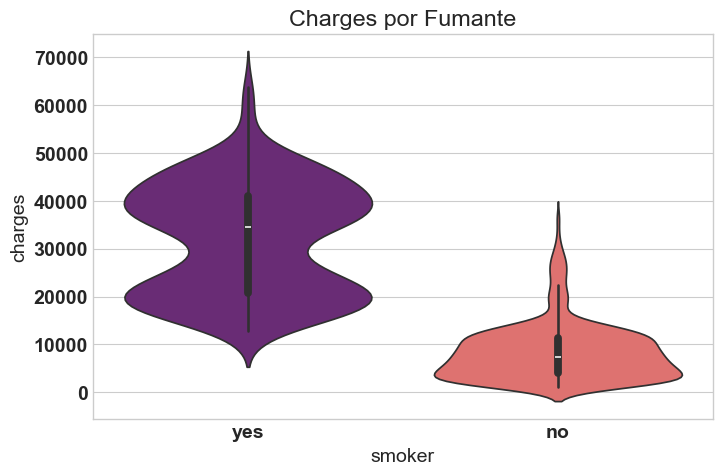

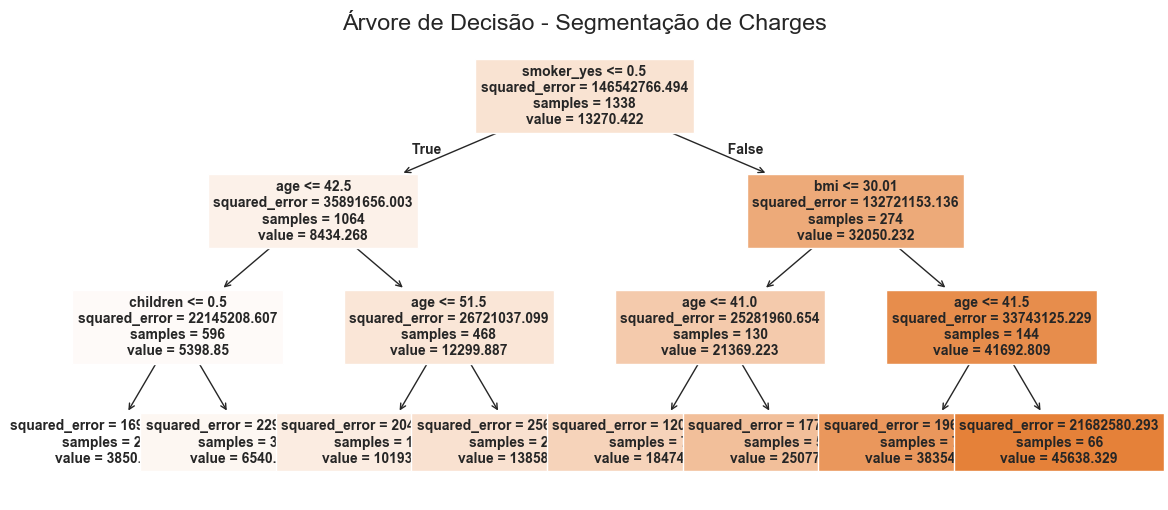

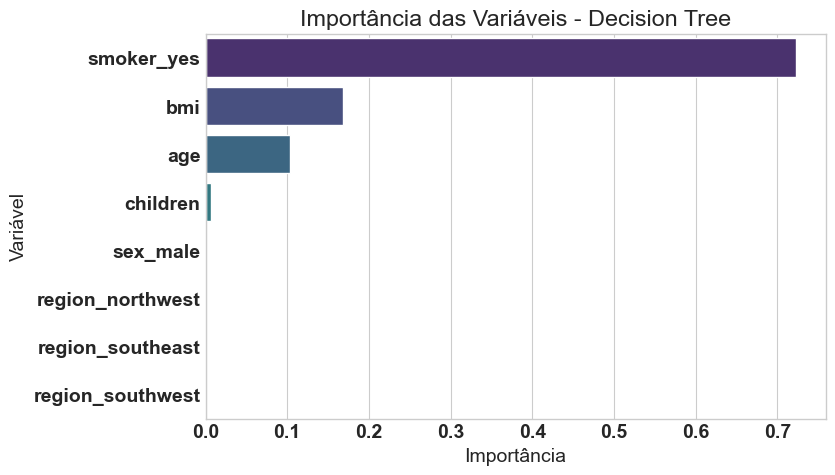

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Opcional: silenciar apenas warnings futuros
warnings.simplefilter(action='ignore', category=FutureWarning)

# ===== 1. Visão geral =====
print(df.info())
print(df.describe())

# ===== 2. Heatmap de correlação =====
plt.figure(figsize=(8,6))
corr = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr, cmap='Wistia', annot=True)
plt.title('Heatmap de Correlação')
plt.show()

# ===== 3. Histograma de charges =====
plt.figure(figsize=(10,4))
sns.histplot(df['charges'], bins=50, color='r', kde=True)
plt.title('Distribuição de Charges')
plt.show()

# ===== 4. Violin plot: sexo vs charges =====
plt.figure(figsize=(8,5))
sns.violinplot(x='sex', y='charges', data=df, palette='Wistia')
plt.title('Charges por Sexo')
plt.show()

# ===== 5. Violin plot: fumante vs charges =====
plt.figure(figsize=(8,5))
sns.violinplot(x='smoker', y='charges', data=df, palette='magma')
plt.title('Charges por Fumante')
plt.show()

# ===== 6. Pequena árvore de decisão =====
df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop(columns='charges')
y = df_encoded['charges']

tree = DecisionTreeRegressor(max_depth=3, random_state=42)
tree.fit(X, y)

plt.figure(figsize=(14,6))
plot_tree(tree, feature_names=X.columns, filled=True, fontsize=10)
plt.title('Árvore de Decisão - Segmentação de Charges')
plt.show()

# ===== 7. Importância das variáveis =====
importances = pd.Series(tree.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=importances.index, palette="viridis")
plt.title('Importância das Variáveis - Decision Tree')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


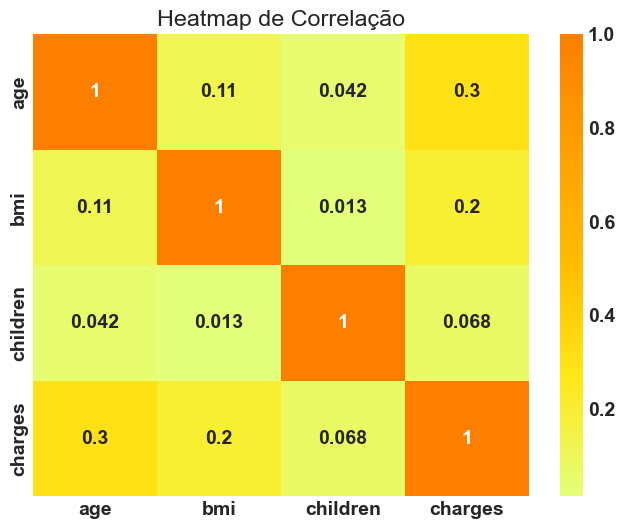

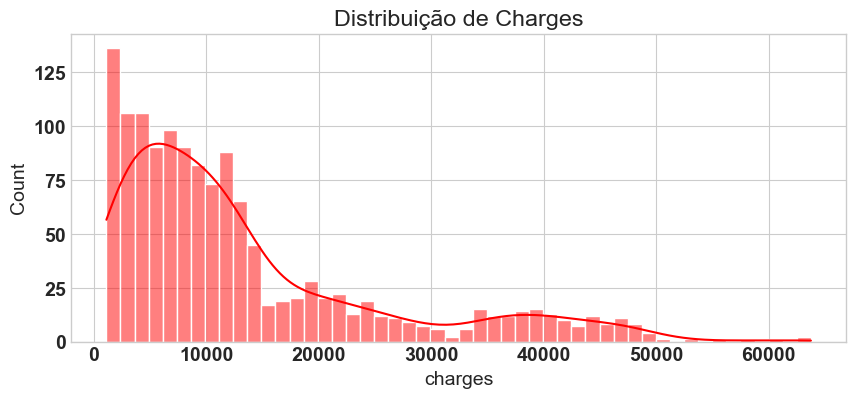

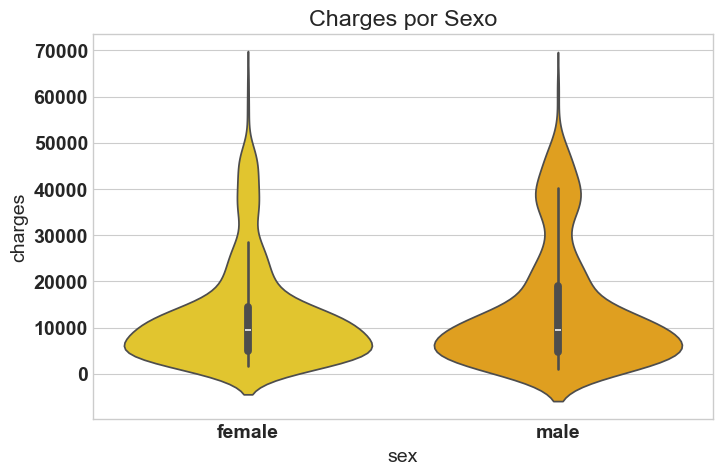

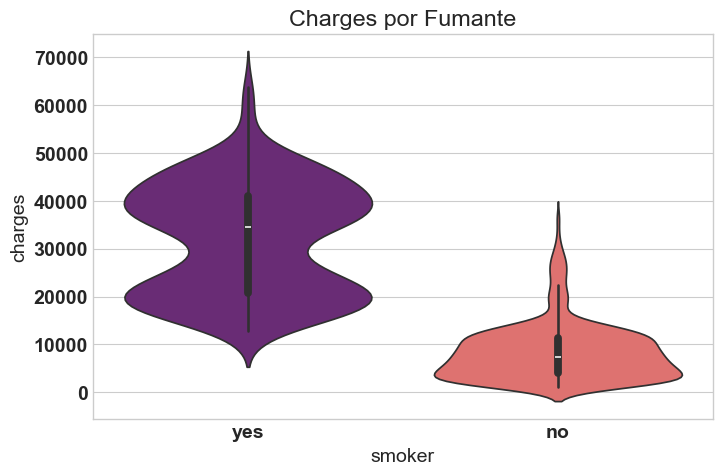

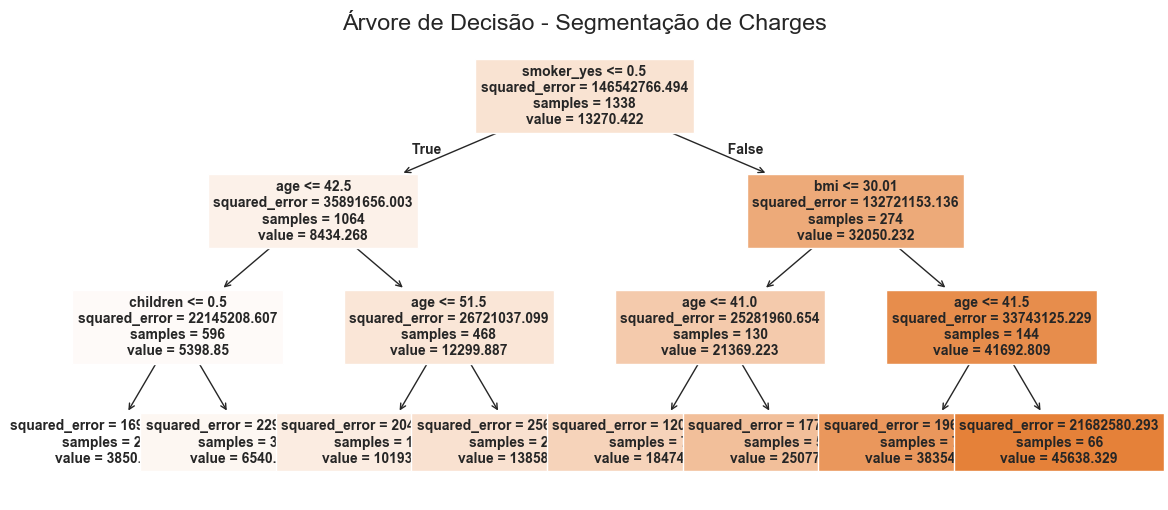

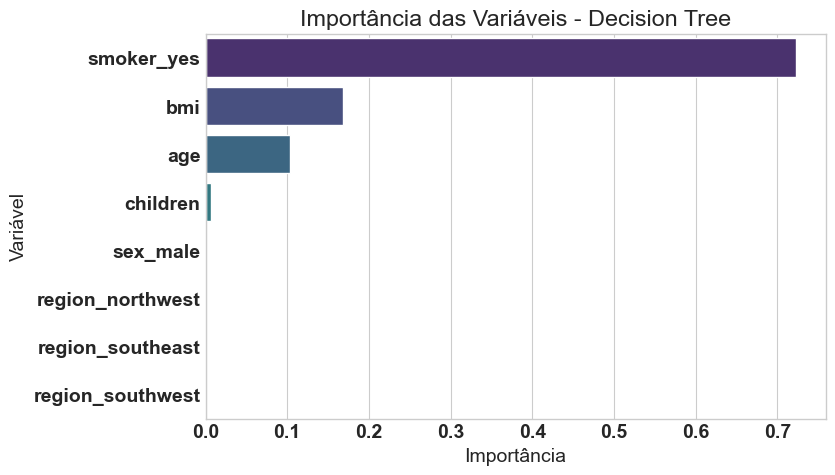

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Silenciar apenas FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# ===== 1. Visão geral =====
display(df.info())
display(df.describe())

# ===== 2. Heatmap de correlação =====
plt.figure(figsize=(8,6))
corr = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr, cmap='Wistia', annot=True)
plt.title('Heatmap de Correlação')
plt.show()

# ===== 3. Histograma de charges =====
plt.figure(figsize=(10,4))
sns.histplot(df['charges'], bins=50, color='r', kde=True)
plt.title('Distribuição de Charges')
plt.show()

# ===== 4. Violin plot: sexo vs charges =====
plt.figure(figsize=(8,5))
sns.violinplot(x='sex', y='charges', data=df, palette='Wistia')
plt.title('Charges por Sexo')
plt.show()

# ===== 5. Violin plot: fumante vs charges =====
plt.figure(figsize=(8,5))
sns.violinplot(x='smoker', y='charges', data=df, palette='magma')
plt.title('Charges por Fumante')
plt.show()

# ===== 6. Árvore de decisão =====
df_encoded = pd.get_dummies(df, drop_first=True)
X = df_encoded.drop(columns='charges')
y = df_encoded['charges']

tree = DecisionTreeRegressor(max_depth=3, random_state=42)
tree.fit(X, y)

plt.figure(figsize=(14,6))
plot_tree(tree, feature_names=X.columns, filled=True, fontsize=10)
plt.title('Árvore de Decisão - Segmentação de Charges')
plt.show()

# ===== 7. Importância das variáveis =====
importances = pd.Series(tree.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=importances.index, palette="viridis")
plt.title('Importância das Variáveis - Decision Tree')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.show()


